In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [2]:
uploaded = files.upload()

Saving train.csv to train (2).csv


In [0]:
train= pd.read_csv(io.StringIO(uploaded["train.csv"].decode("utf-8")))

In [6]:
print("Size of training data-set :", train.shape)
train.head()

Size of training data-set : (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
uploaded_ = files.upload()

Saving test.csv to test.csv


In [0]:

test= pd.read_csv(io.StringIO(uploaded_["test.csv"].decode("utf-8")))

In [299]:
print("Size of testing data-set is :",test.shape)
test.head()

Size of testing data-set is : (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = (train.iloc[:,1:].values).astype('float32') 
y_train = train.iloc[:,0].values.astype('int32') 
X_test = test.values.astype('float32')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

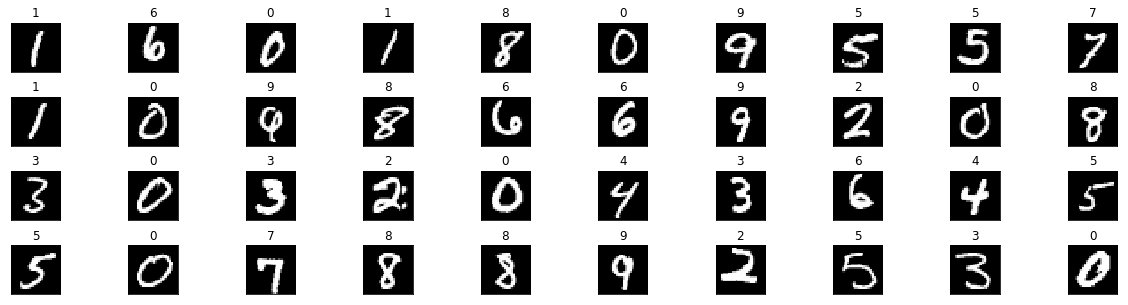

In [302]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
plt.figure(1 , figsize = (20 , 5))
n=0
for i in range(40):
    n += 1 
    r = np.random.randint(0 , train.shape[0] , 1)
    plt.subplot(4 , 10 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 1)
    plt.imshow(X_train[r[0]], cmap=plt.get_cmap('Greys_r'))
    plt.title(y_train[r[0]])
    plt.xticks([])
    plt.yticks([])

In [303]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [304]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [0]:
from keras.models import Sequential

from keras.layers import Dense , Dropout , Flatten, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.callbacks import EarlyStopping

In [0]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)

In [0]:

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',  loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [308]:
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [309]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
dense_109 (Dense)            (None, 14, 14, 32)        1056      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 7, 7, 32)          128       
__________

In [0]:
# set early stopping monitor
early_stopping_monitor = EarlyStopping(patience = 3) 

In [311]:

Neural = model.fit(X_train, y_train, epochs = 30, validation_split = 0.3, callbacks = [early_stopping_monitor])


Train on 29399 samples, validate on 12601 samples
Epoch 1/30
29399/29399 [==============================] - 39s 1ms/step - loss: 0.6323 - acc: 0.7985 - val_loss: 0.6224 - val_acc: 0.7939
Epoch 2/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4837 - acc: 0.8465 - val_loss: 0.5050 - val_acc: 0.8364
Epoch 3/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4579 - acc: 0.8560 - val_loss: 0.4870 - val_acc: 0.8395
Epoch 4/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4424 - acc: 0.8602 - val_loss: 0.4517 - val_acc: 0.8543
Epoch 5/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4287 - acc: 0.8642 - val_loss: 0.4807 - val_acc: 0.8421
Epoch 6/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4248 - acc: 0.8656 - val_loss: 0.4514 - val_acc: 0.8549
Epoch 7/30
29399/29399 [==============================] - 36s 1ms/step - loss: 0.4151 - acc: 0.8692 - val_loss: 0.4344 - val_acc

In [0]:
values  = Neural.history
validation_loss = values['val_loss']
validation_acc = values['val_acc']
training_acc = values['acc']
training_loss = values['loss']
epochs = range(1, len(training_acc) + 1)

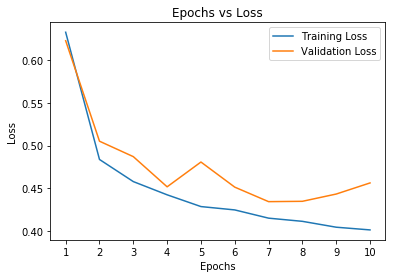

In [313]:

plt.plot(epochs,training_loss,label = 'Training Loss')
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.show()

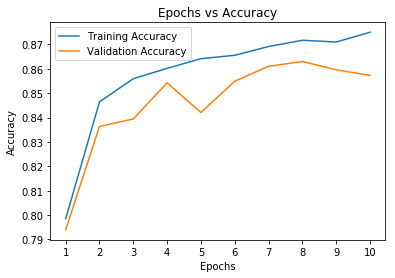

In [314]:
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predictions = model.predict_classes(X_test, verbose=0)

test["label"]= pd.DataFrame( predictions)

In [316]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
X_test = (test.iloc[:,:784].values).astype('float32') 
y_test = test["label"]

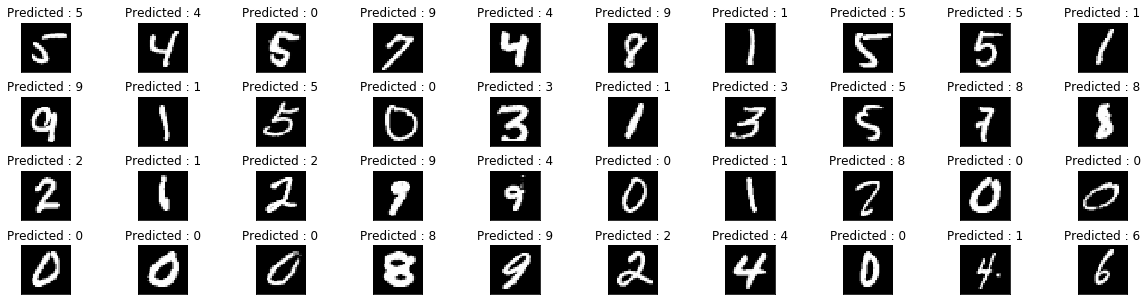

In [320]:
X_test = X_test.reshape(X_test.shape[0], 28, 28)
plt.figure(1 , figsize = (20 , 5))
n=0
for i in range(40):
    n += 1 
    r = np.random.randint(0 , test.shape[0] , 1)
    plt.subplot(4 , 10 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 1)
    plt.imshow(X_test[r[0]], cmap=plt.get_cmap('Greys_r'))
    plt.title("Predicted : {}".format(y_test[r[0]]))
    plt.xticks([])
    plt.yticks([])